<a href="https://colab.research.google.com/github/Bindulekh/private/blob/main/M1_L2_Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import io
import numpy as np
import matplotlib
import seaborn as sns

In [14]:
df=pd.read_csv('/content/Iris.csv')

In [15]:
df.head(3)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa


In [16]:
df.isnull().values.any()

False

In [17]:
df.Species.value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [19]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


<Axes: xlabel='SepalLengthCm', ylabel='SepalWidthCm'>

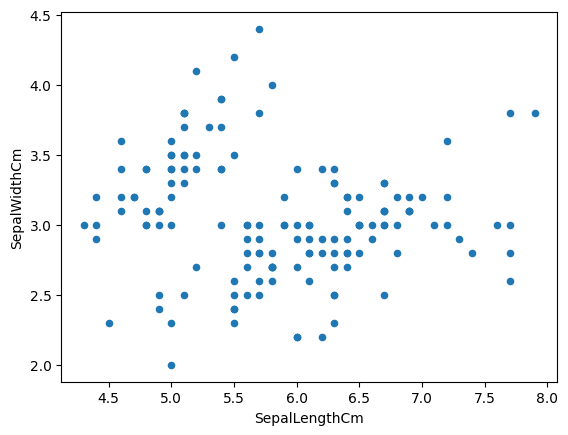

In [22]:
df.plot(kind="scatter", x="SepalLengthCm", y="SepalWidthCm")

<ipython-input-24-3d5530c7dca5>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Species", y="PetalLengthCm", palette="husl", data=df)


<Axes: xlabel='Species', ylabel='PetalLengthCm'>

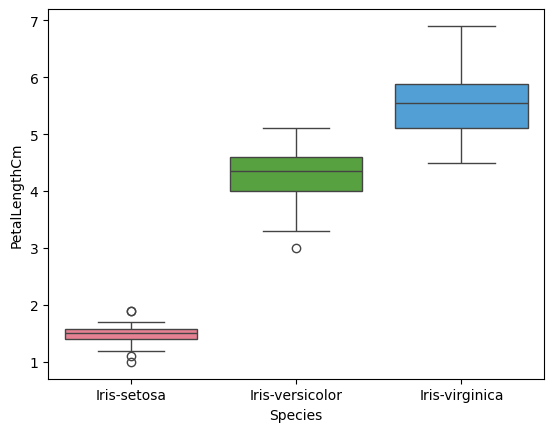

In [24]:
sns.boxplot(x="Species", y="PetalLengthCm", palette="husl", data=df)

<ipython-input-25-fdd870bb7d92>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="Species", y="PetalLengthCm", palette="husl", data=df)


<Axes: xlabel='Species', ylabel='PetalLengthCm'>

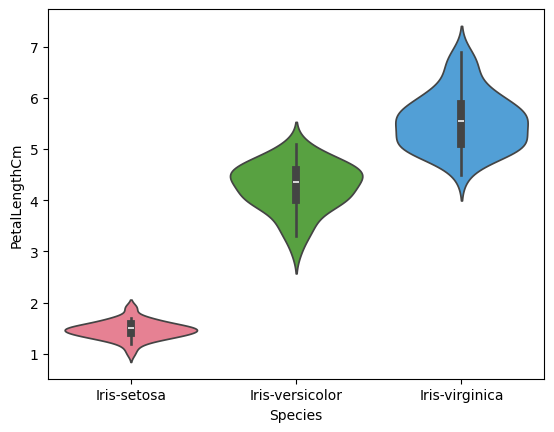

In [25]:
sns.violinplot(x="Species", y="PetalLengthCm", palette="husl", data=df)

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


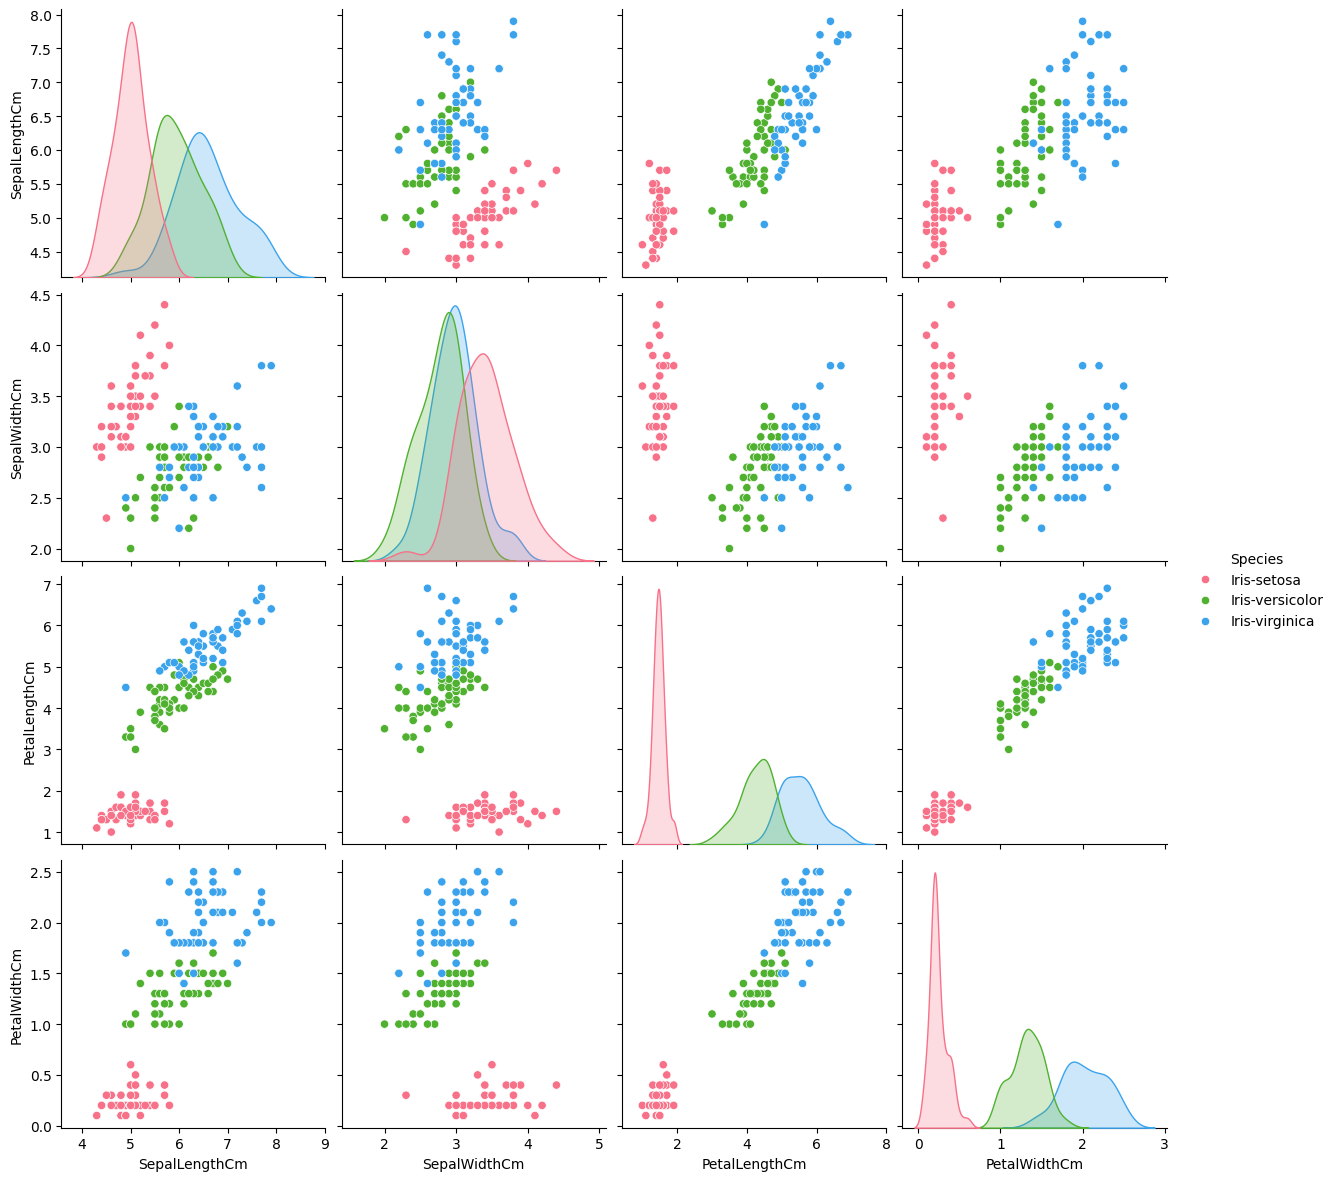

In [26]:
sns.pairplot(df.drop("Id", axis=1), hue="Species", palette="husl", size=3)

In [28]:
print(df['Species'].unique())

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [31]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

# Encode labels in the 'species' column
df['Species'] = label_encoder.fit_transform(df['Species'])

# Check the transformed labels
print(df['Species'].unique())

[0 1 2]


In [32]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,2
146,147,6.3,2.5,5.0,1.9,2
147,148,6.5,3.0,5.2,2.0,2
148,149,6.2,3.4,5.4,2.3,2


In [33]:
X = df.iloc[:, :-1].values
y = df["Species"]

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [36]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [37]:
y_pred = log_reg.predict(X_test)

In [38]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = accuracy_score(y_test,y_pred)
print("Accuracy:",result1)

Confusion Matrix:
[[ 7  0  0]
 [ 0 15  0]
 [ 0  0  8]]
Accuracy: 1.0


In [39]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)


KNeighborsClassifier()

In [40]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors' : [3,5,7,9,10,11,12,13,15,17]}
gridsearch = GridSearchCV(knn, param_grid,cv=10)
gridsearch.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 9, 10, 11, 12, 13, 15, 17]})

In [41]:
gridsearch.best_params_

{'n_neighbors': 3}

In [42]:
gridsearch.best_score_

0.9916666666666666

In [43]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=3)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [44]:
y_pred = classifier.predict(X_test)

In [45]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = accuracy_score(y_test,y_pred)
print("Accuracy:",result1)

Confusion Matrix:
[[ 7  0  0]
 [ 0 15  0]
 [ 0  0  8]]
Accuracy: 1.0
